![EDEM](https://edem.eu/wp-content/uploads/2019/09/cropped-logo-Edem.png)




# Análisis y Aprendizaje Automático - Entregable: Informe Estadístico con Python

***Análisis  cuantitativo  y  cualitativo  en  el  contexto  del BMI y los gastos médicos facturados por el seguro referente a los características de 1338 beneficiarios de 4 regiones en EEUU entre los 18 y 64 años.***

--- 
Informe de Marina Pérez Barber y Franziska Sophie Kröger | EDEM MDA 2022-2023



# 1 OBJETIVOS


## 1.1 Objetivos Generales


*   Realizar un análisis cuantitativo y cualitativo de los datos de BMI y gastos médicos facturados por el seguro en cuatro regiones de los Estados Unidos.

*   Identificar las características de los beneficiarios que están asociadas con un mayor índice de masa corporal y/o mayores gastos médicos.



## 1.2 Objetivos Especificos

1.   Describir el dataset según las características de los beneficiarios
2.   Comprobar la relación entre el BMI y los gastos médicos
3.   Comprobar si el BMI sigue una distribución normal
4.   Comprobar si los resultados de una muestra aleatoria son significativamente diferentes de los de la población o si pueden extraerse conclusiones comunes 
5.   Analizar las medias del BMI frente el género
6.   Analizar las medias de los gastos médicos en función del hábito de fumar
7.   Analizar el BMI según el número de hijos de los asegurados
8.   Analizar el BMI según la región en la que vive el asegurado


# 2 MATERIALES Y METODOLOGÍA

## 2.1 Materiales

**Población de estudio**:
Corresponde a 1338 beneficiarios de cuatro regiones EEUU, obtenidos del
[Dataset "Medical Cost Personal Datasets"](https://www.kaggle.com/datasets/mirichoi0218/insurance) de Kaggle.

**Muestra utilizada**: Corresponde a todos los beneficiarios, por tanto se considera la población igual a la muestra.

**Descripción del dataset**:
El dataset consta de 1338 filas o instancias y 7 columnas, que se explican con más detalle en la tabla siguiente:

| Variable | Tipo de variable | Tipo de data | Descripción |
|---|---|---|---|
|**age**|cuantitativa discreta|int|edad del beneficiario principal|
|**sex**|categórica nominativa|str|género del contratista del seguro, hombre o mujer|
|**bmi**|cuantitativa continua|float|índice de masa corporal, que mide el contenido de grasa corporal en relación a la estatura y el peso|
|**children**|cuantitativa discreta|int|número de hijos cubiertos por el seguro de enfermedad / número de personas a cargo|
|**smoker**|categórica nominativa|str|si el beneficiario es fumador o no|
|**region**|categórica nominativa|str|zona residencial del beneficiario en US|
|**charges**|cuantitativa continua|float|gastos médicos individuales facturados por el seguro|


## 2.2 Metodología

### Descriptiva
*  La estadística descriptiva consiste en describir nuestra muestra con la ayuda de las siguientes herramientas: **gráficos y cálculos estadísticos** resumidos en tablas (p.ej. tabla de frecuencia, media, varianza, medidas de posición, etc.). 

*  Para realizar la **estadística descriptiva bivariante** utilizamos las medidas de covarianza y coeficiente de Pearson.

### Estudio de Normalidad
*  Para el análisis de normalidad utilizamos uno de los **métodos gráficos** más empleados que consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación típica que la de los datos disponibles.

*  Los estadísticos de **asimetría (Skewness) y curtosis** pueden emplearse para detectar desviaciones de la normalidad. La curtosis caracteriza la elevación o el achatamiento relativo de una distribución, comparada con la distribución normal. Por otro lado, Skewness mide el grado de asimetría de la distribución con respecto a la media.

*  Para analizar si una distribución es normal se realiza los test **Shapiro-Wilk test y D'Agostino's K-squared test**. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

### Inferencia estadística con estimación
*  Para obtener información sobre la población de la que se recopilaron nuestros datos e investigar las diferencias entre las muestras de datos realizamos la **estimación puntual** y analizamos los **intervalos de confianza**.

### Prueba t/ t-test (medias)
*  Realizamos unas **pruebas t-test** para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí. En ambos, se considera como hipótesis nula que las medias son iguales. A diferencia de la prueba de una muestra en la que probamos contra un parámetro de población conocido, la prueba de dos muestras sólo involucra medias de muestra.

### ANOVA
*  Con el **ANOVA unidireccional** probamos si la media de alguna variable numérica difiere entre los niveles de una variable categórica.
*  Para ello, comprobamos las **condiciones de aplicabilidad** en primer lugar:
  1.   Poblaciones normalmente distribuidas en cada grupo
  2.   Homocedaticidad de varianzas entre grupos
  3.   Muestra aleatoria e independiente


# 3 RESULTADOS Y ANÁLISIS

## 3.0 Librerías

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3.1 Definición de variables

In [3]:
# Creamos dataframes para diferenciar entre hombres y mujeres
df_women = df[df['sex'] == "female"] 
df_men = df[df['sex'] == "male"]

In [4]:
# Calculamos medias de BMI
mean_bmi_all = df["bmi"].mean()
mean_bmi_women = df_women["bmi"].mean()
mean_bmi_men = df_men["bmi"].mean()

print(f"""
media del BMI de toda la población: {mean_bmi_all}
media del BMI de mujeres: {mean_bmi_women}
media del BMI de hombres: {mean_bmi_men}
""")


media del BMI de toda la población: 30.66339686098655
media del BMI de mujeres: 30.37774924471299
media del BMI de hombres: 30.943128698224854



In [5]:
# Creamos dataframes para diferenciar entre fumadores y no-fumadores
df_smoker = df[df['smoker'] == "yes"] 
df_nonsmoker = df[df['smoker'] == "no"]

In [6]:
# Calculamos medias de charges de los 3 dataframes
mean_charges_all = df["charges"].mean()
mean_charges_smoker = df_smoker["charges"].mean()
mean_charges_nonsmoker = df_nonsmoker["charges"].mean()

print(f"""
media de los costes de toda la población: {mean_charges_all}
media de los costes de fumadores: {mean_charges_smoker}
media de los costes de no-fumadores: {mean_charges_nonsmoker}
""")


media de los costes de toda la población: 13270.422265141257
media de los costes de fumadores: 32050.23183153284
media de los costes de no-fumadores: 8434.268297856204



In [7]:
# Guardamos columnas del BMI como variables
bmi = df["bmi"]
bmi_men = df_men["bmi"]
bmi_women = df_women["bmi"]

## 3.2 Descriptiva

### 3.2.a Descriptiva univariante: Variables categóricas

#### Tablas de frecuencia (relativa)


In [8]:
# Descriptiva de la variable categórica "sex" con tabla de frecuencia
tab = pd.crosstab(index=df['sex'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
sex,
female,49.48
male,50.52


In [9]:
# Descriptiva de la variable categórica "smoker" con tabla de frecuencia
tab = pd.crosstab(index=df['smoker'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
smoker,
no,79.52
yes,20.48


In [10]:
# Descriptiva de la variable categórica "region" con tabla de frecuencia
tab = pd.crosstab(index=df['region'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
region,
northeast,24.22
northwest,24.29
southeast,27.20
southwest,24.29


In [11]:
# Descriptiva de la variables categóricas "sex" vs "smoker" con tabla de frecuencia
pd.crosstab(index=df['sex'], columns=df['smoker'],margins=True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


#### Diagramas de sectores

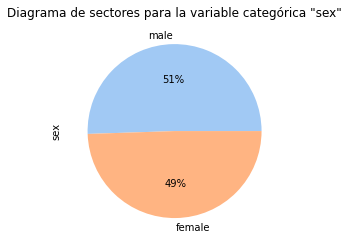

In [12]:
# Diagrama de sectores para la variable categórica "sex"
colors = sns.color_palette('pastel')[0:5]

genderCounts = df['sex'].value_counts()

genderCounts.plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Diagrama de sectores para la variable categórica "sex"')
plt.show()

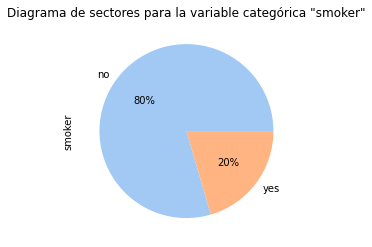

In [14]:
# Diagrama de sectores para la variable categórica "smoker"
colors = sns.color_palette('pastel')[0:5]

smokersCounts = df['smoker'].value_counts()

smokersCounts.plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Diagrama de sectores para la variable categórica "smoker"')
plt.show()

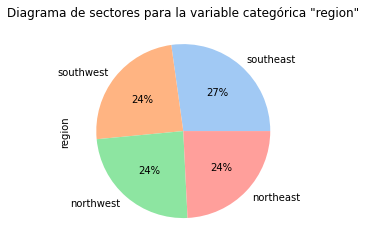

In [15]:
# Diagrama de sectores para la variable categórica "region"
colors = sns.color_palette('pastel')[0:5]

regionsCounts = df['region'].value_counts()

regionsCounts.plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Diagrama de sectores para la variable categórica "region"')
plt.show()

### 3.2.b Descriptiva univariante: Variables cuantitativas


#### Medidas descriptivas univariantes con describe()

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Diagrama de barras

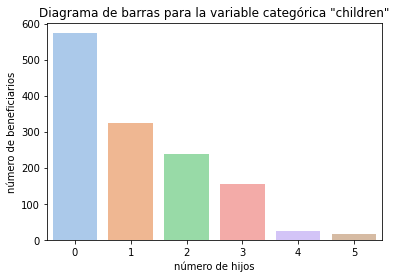

In [17]:
# Diagrama de barras para la variable cuantitativa discreta "children"
sns.countplot(data=df, x='children', palette='pastel')
plt.title('Diagrama de barras para la variable categórica "children"')
plt.xlabel('número de hijos')
plt.ylabel('número de beneficiarios')
plt.show()

#### Histogramas


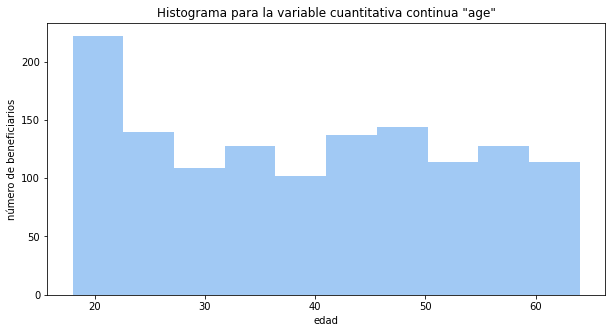

In [18]:
# Histograma para la variable cuantitativa continua "age"
colors = sns.color_palette('pastel')[0]
df['age'].plot(kind='hist', figsize=(10, 5), color = colors)
plt.xlabel('edad')
plt.ylabel('número de beneficiarios')
plt.title('Histograma para la variable cuantitativa continua "age"')
plt.show()

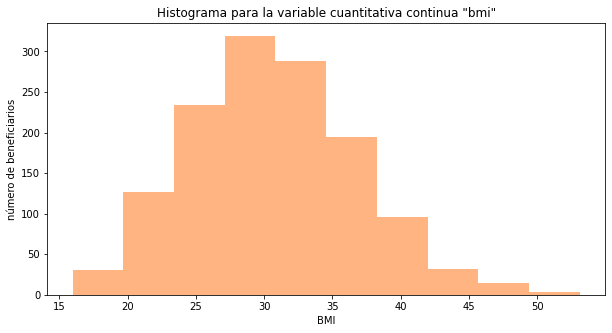

In [19]:
# Histograma para la variable cuantitativa continua "bmi"
colors = sns.color_palette('pastel')[1]
df['bmi'].plot(kind='hist', figsize=(10, 5), color = colors)
plt.xlabel('BMI')
plt.ylabel('número de beneficiarios')
plt.title('Histograma para la variable cuantitativa continua "bmi"')
plt.show()

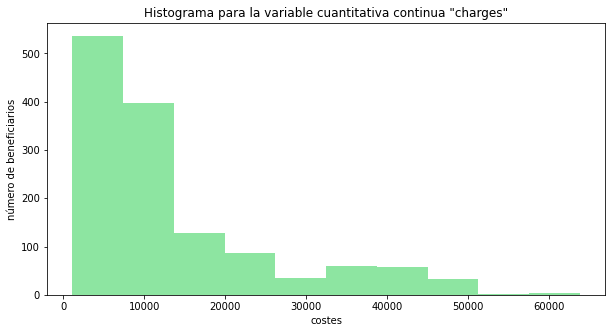

In [20]:
# Histograma para la variable cuantitativa continua "charges"
colors = sns.color_palette('pastel')[2]
df['charges'].plot(kind='hist', figsize=(10, 5), color = colors)
plt.xlabel('costes')
plt.ylabel('número de beneficiarios')
plt.title('Histograma para la variable cuantitativa continua "charges"')
plt.show()

#### Diagramas de Box-Whisker/ Boxplots



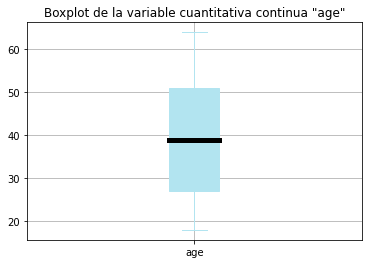

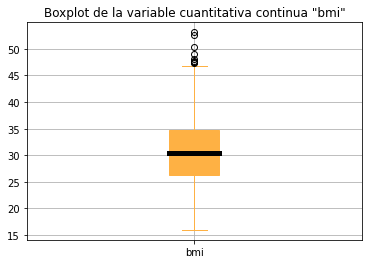

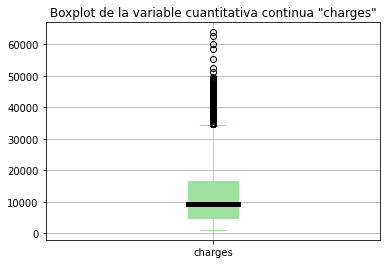

In [75]:
# Boxplots de variables cuantitativas continuas 
lista = ['age', 'bmi', 'charges']
colors = ['#b2e4f0', '#feb144', '#9ee09e']
medianprops = dict(linestyle='-', linewidth=5, color='black')

n =0
for element in lista:
  fig, ax = plt.subplots()
  bplot = df.boxplot(column=element, color=colors[n], patch_artist=True, medianprops=medianprops)
  plt.title(f'Boxplot de la variable cuantitativa continua "{element}"')
  n+=1


### 3.2.c Descriptiva bivariante: BMI y los gastos médicos

#### Covarianza

In [22]:
# Calculamos la covarianza entre las variables "bmi" y "charges"
x = bmi
y = df["charges"]

covariance = np.cov(x, y)[0][1]
print("La covarianza es:", covariance)

La covarianza es: 14647.30442632216


Interpretación de la covarianza:
1. Si **Cov(X, Y)>0**, entonces X e Y tienden a moverse en la misma dirección 
2. si **Cov(X, Y)<0**, entonces X e Y tienden a moverse en la dirección opuesta
3. si **Cov(X, Y)=0**, entonces es que son independientes

En este caso tenemos que Cov(X,Y)>0, por tanto, es de esperar que las variables tiendan a moverse en la misma dirección. 
Es importante tener en cuenta que el resultado de la covarianza depende de la escala de las variables y, por lo tanto, es difícil de interpretar sin tener en cuenta otros aspectos del análisis estadístico.

#### Coeficiente de Pearson

In [23]:
# Calculamos el coeficiente de correlación de Pearson
x = bmi
y = df["charges"]

corr, p_value = stats.pearsonr(x, y)
print("El coeficiente de correlación de Pearson es:", corr)
print("El valor p es:", p_value)

El coeficiente de correlación de Pearson es: 0.1983409688336288
El valor p es: 2.459085535116766e-13


Interpretación del coeficiente de Pearson:
1. Cuanto **más cerca de -1**, más fuerte será la relación lineal negativa entre ambas variables
2. Cuanto **más cerca de 1**, más fuerte será la relación lineal positiva entre las variables
3. Cuanto **más cerca de 0**, menos probable que exista una relación lineal entre ambas variables

Por tanto, en nuestro caso, como el coeficiente está cerca del 0 es menos probable que exista una relación lineal entre ambas.

#### Scatterplot

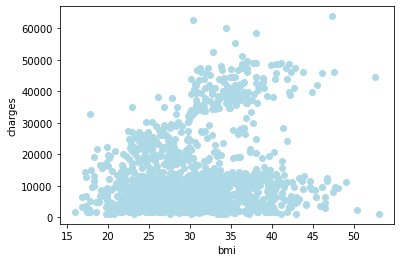

In [24]:
# Scatterplot: bmi vs. charges
plt.scatter(bmi, df["charges"], color = 'lightblue')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

Con este gráfico observamos que, como habías supuesto con el coeficiente de Pearson, nuestras variables "BMI" y "charges" no mantienen una relación lineal entre ellas.

## 3.3 Estudios de Normalidad
Como podemos observar en la sección 3.2.b Histogramas, la variable "BMI" parece ser la única que posiblemente siga una distribución normal. Por lo tanto, a continuación se realiza el estudio de normalidad para esta variable:

*   a) para toda la población
*   b) solo para los hombres
*   c) solo para las mujeres

### 3.3.a Estudio de normalidad de la variable "BMI" para toda la población


#### Métodos gráficos

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.

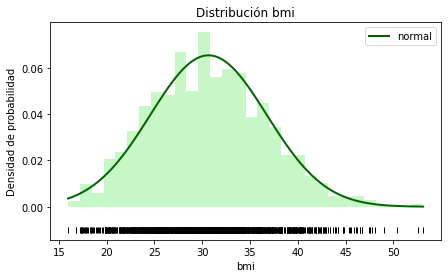

In [25]:
# Histograma + distribución normal teórica

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(bmi)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(bmi), max(bmi), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color= "darkgreen", label='normal')
ax.hist(x=bmi, density=True, bins=30, color="lightgreen", alpha=0.5)
ax.plot(bmi, np.full_like(bmi, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución bmi')
ax.set_xlabel('bmi')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Otro método gráfico empleado para el análisis de la normalidad son los diagramas de cajas, puesto que si la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.

<Axes: >

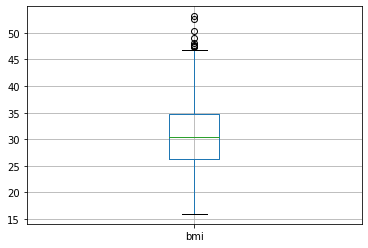

In [26]:
# Boxplot de bmi
fig, ax = plt.subplots()
df.boxplot(column="bmi")

En este caso comprobamos que la mediana es bastante céntrica, con lo que es probable que nos encontremos ante una distribución normal.

Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

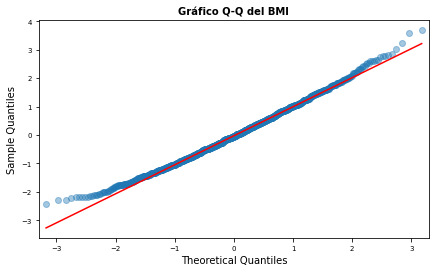

In [27]:
# Gráfico Q-Q de bmi
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    bmi,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del BMI', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Aunque en los extremos los puntos se van un poco de la recta, el análisis gráfico parece indicar que los datos 
siguen una distribución normal.

#### Métodos analíticos asimetría y curtosis
Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. 

La curtosis caracteriza la elevación o el achatamiento relativo de una distribución, comparada con la distribución normal. Una curtosis positiva indica una distribución relativamente elevada, mientras que una curtosis negativa indica una distribución relativamente plana. Por tanto, cuanto más cercano sea el valor de curtosis a 0, esto indica una distribución relativamente normal.

Por otro lado, Skewness mide el grado de asimetría de la distribución con respecto a la media. Un valor positivo de este indicador significa que la distribución se encuentra sesgada hacia la izquierda (orientación positiva). Un resultado negativo significa que la distribución se sesga a la derecha. Un valor cercano a 0 nos indica que la distribución es bastante simétrica, y por tanto, relativamente normal.

In [28]:
print('Curtosis:', stats.kurtosis(bmi))
print('Skewness:', stats.skew(bmi))

Curtosis: -0.05502310583700032
Skewness: 0.28372857291709386


Tanto el coeficiente de curtosis como el de asismetría son cercanos a 0, por lo tanto parece que la distrubción que sigue nuestra variable "BMI" es normal.

#### Contraste de hipótesis
Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-valor de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-valor es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal, por tanto, como disponemos de más de 1000 datos, aplicaremos el test D'Agostino's K-squared.

In [29]:
#D'Agostino's K-squared test
k2, p_value = stats.normaltest(bmi)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 17.581447872784118, p-value = 0.0001521377897266011


En este caso, el p-valor es 0.00015, lo que indica que hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, los datos son significativamente diferentes de una distribución normal.

A pesar del D'Agostino's K-squared test, todas las pruebas nos indican que la distribución que sigue BMI sigue una distribución normal.

### 3.3.b Estudio de normalidad de "BMI" para los hombres


#### Métodos gráficos

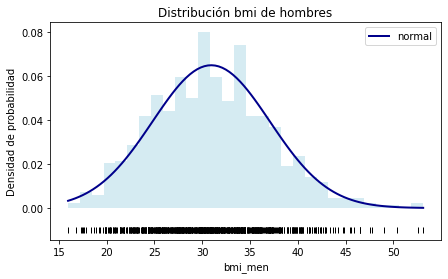

In [30]:
# Histograma + distribución normal teórica

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(bmi_men)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(bmi_men), max(bmi_men), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color="darkblue", label='normal')
ax.hist(x=bmi_men, density=True, bins=30, color="lightblue", alpha=0.5)
ax.plot(bmi_men, np.full_like(bmi_men, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución bmi de hombres')
ax.set_xlabel('bmi_men')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Gráficamente observamos que la variable bmi_men parece seguir una distribución normal

<Axes: >

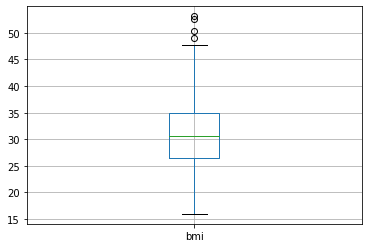

In [31]:
# Boxplot de bmi
fig, ax = plt.subplots()
df_men.boxplot(column="bmi")

Este boxplot tiene la mediana bastante centrada, por lo tanto parece meidana=media y que la distrubción es normal.


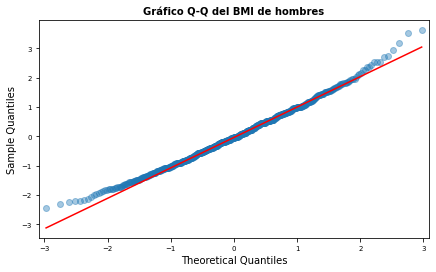

In [32]:
# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    bmi_men,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del BMI de hombres', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Aunque en los extremos los puntos se van un poco de la recta, el análisis gráfico parece indicar que los datos 
siguen una distribución normal.

#### Métodos analíticos asimetría y curtosis

In [33]:
print('Cursotis:', stats.kurtosis(bmi_men))
print('Skewness:', stats.skew(bmi_men))

Cursotis: 0.11535512442850493
Skewness: 0.3166004408275802


Los coeficientes de curtosis y asismetría se acercan al 0 ambos, por lo tanto parece que la distrubción es normal.

#### Contraste de hipótesis

In [34]:
#D'Agostino's K-squared test
k2, p_value = stats.normaltest(bmi_men)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 11.546500396815057, p-value = 0.0031096341436536996


En este caso, el p-valor es 0.003, lo que indica que hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal a un nivel de confianza del 95%. En otras palabras, los datos son significativamente diferentes de una distribución normal.

A pesar del D'Agostino's K-squared test, todas las pruebas indican más o menos que la distribución es normal.

### 3.3.c Estudio de normalidad de "BMI" para las mujeres


#### Métodos gráficos

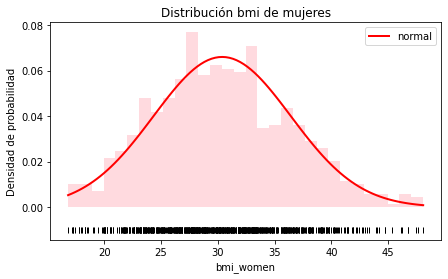

In [35]:
# Histograma + distribución normal teórica

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(bmi_women)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(bmi_women), max(bmi_women), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, color="red", label='normal')
ax.hist(x=bmi_women, density=True, bins=30, color="lightpink", alpha=0.5)
ax.plot(bmi_women, np.full_like(bmi_women, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución bmi de mujeres')
ax.set_xlabel('bmi_women')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Gráficamente observamos que la variable bmi_women parece seguir una distribución normal

<Axes: >

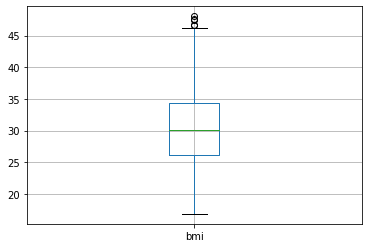

In [36]:
# Boxplot de bmi
fig, ax = plt.subplots()
df_women.boxplot(column="bmi")

#Este boxplot es bastante centrado, por lo tanto parece que la distrubción es normal.

Este boxplot tiene la mediana bastante centrada, por lo tanto parece meidana=media y que la distrubción es normal.


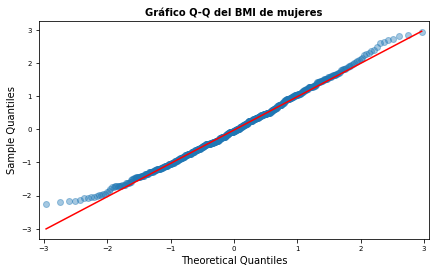

In [37]:
# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    bmi_women,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del BMI de mujeres', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Aunque en los extremos los puntos se van un poco de la recta, el análisis gráfico parece indicar que los datos 
siguen una distribución normal.

#### Métodos analíticos asimetría y curtosis

In [38]:
print('Cursotis:', stats.kurtosis(bmi_women))
print('Skewness:', stats.skew(bmi_women))

Cursotis: -0.25829952693188574
Skewness: 0.24594408306584623


Los coeficientes de curtosis y asismetría se acercan al 0 los dos, por lo tanto parece que la distrubción es normal.

#### Contraste de hipótesis

In [39]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(bmi_women)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 8.702256368506658, p-value = 0.012892259528571495


En este caso, el p-valor es 0.012, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula a un nivel de confianza del 99%. En otras palabras, los datos no son significativamente diferentes de una distribución normal.

En conclusión, todas las pruebas indican que la variable "BMI" en las mujeres sigue una distribución es normal.

## 3.4 Inferencia estadística con estimación

*Nota: Como nosotras no tenemos los datos poblacionales (de todos EEUU), sino que tenemos una muestra de estos, hemos decidido crear una submuestra de la que estimaremos la media y la compararemos con la de nuestra muestra total.*

### 3.4.a Estimación puntual
Las estimaciones puntuales son estimaciones de parámetros de población basadas en datos de muestra.
La media muestral no suele ser exactamente igual a la media poblacional. Esta diferencia puede deberse a muchos factores, incluido el diseño deficiente de la encuesta, los métodos de muestreo sesgados y la aleatoriedad inherente a la extracción de una muestra de una población.

In [78]:
# Hacemos una estimación puntual de la media poblacional
np.random.seed(6)
sample_bmi = np.random.choice(a=bmi,
                              size=100)

print (sample_bmi.mean())
bmi.mean() - sample_bmi.mean()

29.165


0.008503086419754169

Podemos observar que la diferencia entre la estimación de la muestra poblacional y su valor verdadero es de 0.0085, una diferencia poco significativa, con lo que observamos que con una pequeña muestra de los datos conseguimos una buena estimación de la media poblacional.

### 3.4.b Intervalos de confianza
Una estimación puntual puede darle una idea aproximada de un parámetro de población como la media, pero las estimaciones son propensas a errores y puede que no sea factible tomar varias muestras para obtener estimaciones mejoradas. 

Un intervalo de confianza es un rango de valores por encima y por debajo de una estimación puntual que captura el verdadero parámetro de la población en algún nivel de confianza predeterminado. Por ejemplo, si deseamos tener un 95 % de posibilidades de capturar el parámetro de población real con una estimación puntual y un intervalo de confianza correspondiente, estableceriamos su nivel de confianza en 95 %. Los niveles de confianza más altos dan como resultado intervalos de confianza más amplios.

In [88]:
# Hacemos una estimación por intervalos
print(f"""media poblacional: {mean_bmi_all}

Intervalo de confianza de la submuestra:""")
sample_stdev = sample_bmi.std(ddof=1)
sample_size = 100
sigma = sample_stdev/math.sqrt(sample_size)

stats.t.interval(confidence = 0.95,         # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = mean_bmi_all,        # Sample mean
                 scale = sigma)             # Standard deviation estimate

media poblacional: 30.66339686098655

Intervalo de confianza de la submuestra:


(29.4841525401262, 31.842641181846897)

Nuestra media poblacional era 30.66, por tanto, está dentro del intervalo de confianza que hemos sacado a partir de la submuestra.

## 3.5 Contraste de hipótisis: t-tests
La prueba T es una prueba estadística utilizada para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí.


### 3.5.a Estudio de t-Tests de la media de "BMI" frente el género


#### Media de BMI de hombres frente la media de "BMI" de la población total

      HO: μ = 30.663397
      
      H1: μ != 30.663397

In [42]:
# T-test
stats.ttest_1samp(a = bmi_men,
                 popmean = mean_bmi_all)

TtestResult(statistic=1.1844483694184842, pvalue=0.23665250996481688, df=675)

El p-valor que obtenemos es mayor que 0.05, por tanto, a un nivel de confianza del 95% tenemos suficientes evidencias estadísticas para no rechazar la hipótesis nula. 

#### Media de BMI de mujeres frente la media de "BMI" de la población total

      HO: μ = 30.663397
      
      H1: μ != 30.663397

In [43]:
# T-test
stats.ttest_1samp(a = bmi_women,
                 popmean = mean_bmi_all)

TtestResult(statistic=-1.2155974988340743, pvalue=0.224572260531349, df=661)

En este caso, el p-valor que obtenemos también es mayor que 0.05. Por tanto, con un nivel de confianza del 95% hay suficientes evidencias estadísticas para no rechazar la hipótesis nula.

#### Media de BMI de hombres frente la media de "BMI" de mujeres

Una prueba t de dos muestras investiga si las medias de dos muestras de datos independientes difieren entre sí. En una prueba de dos muestras, la hipótesis nula es que las medias de ambos grupos son iguales (HO: μ1 = μ2). A diferencia de la prueba de una muestra en la que probamos contra un parámetro de población conocido, la prueba de dos muestras solo involucra medias de muestra.

En primer lugar, calculamos la igualdad de varianzas entre estas dos muestras a través del test de Levene

In [44]:
levene_test = stats.levene(bmi_men, bmi_women, center='median')
levene_test

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

Como el p-valor es mayor que 0.05, no rechazamos la H0 (igualidad de varianzas), entonces para aplicar el t-test podemos poner equal_var=True

In [45]:
# T-test
stats.ttest_ind(a= bmi_men,
                b= bmi_women,
                equal_var=True)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

Como el p-valor es mayor que 0.05, no hay evidencias para rechazar la hipótesis de que las medias de ambos grupos coinciden.

### 3.5.b Estudio de t-Tests de la media de la variable "charges" frente fumar

#### Media de "charges" de fumadores frente la de la población total
    
      HO: μ = 13270.42
      
      H1: μ != 13270.42

In [46]:
# T-test 
stats.ttest_1samp(a = df_smoker["charges"],
                 popmean = mean_charges_all)

TtestResult(statistic=26.934097902356328, pvalue=7.597075461783303e-79, df=273)

Tenemos un p-valor muy pequeño (menor que 0.05), por lo que hay suficientes evidencias estadísticas para rechazar la hipótesis nula.

#### Media de "charges" de no fumadores frente la de la población total
    
      HO: μ = 13270.42
      
      H1: μ != 13270.42

In [47]:
# T-test
stats.ttest_1samp(a = df_nonsmoker["charges"],
                 popmean = mean_bmi_all)

TtestResult(statistic=45.73361270226955, pvalue=2.4763769338264713e-253, df=1063)

En este caso, también tenemos un p-valor muy pequeño (menor que 0.05), por lo que hay evidencias estadísticas para rechazar la hipótesis nula.

#### Media de "charges" de fumadores frente a la media de "charges" de no fumadores

    
      HO: μ1 = μ2
      
      H1: μ1 != μ2

In [48]:
# Comprobamos igualdad de varianzas con Levene
levene_test = stats.levene(df_smoker["charges"], df_nonsmoker["charges"], center='median')
levene_test

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

p < 0.05, por tanto rechazamos la H0 (igualidad de varianzas) y en el t-test se debe poner equal_var=False

In [49]:
# T-test
stats.ttest_ind(a= df_smoker["charges"],
                b= df_nonsmoker["charges"],
                equal_var=False)

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

En este caso, con un p-valor tan pequeño, hay suficientes evidencias estadísticas para rechazar la hipótesis nula. Es decir, las medias de las muestras son completamente distintas.

## 3.6 ANOVA
El ANOVA unidireccional prueba si la media de alguna variable numérica difiere entre los niveles de una variable categórica. Esencialmente responde a la pregunta: ¿Alguna de las medias grupales difiere entre sí? ¿Hay alguna muestra diferente al resto?

----

En primer lugar, comprobamos las condiciones de aplicabilidad:
1.   Poblaciones normalmente distribuidas en cada grupo
2.   Homocedaticidad de varianzas entre grupos
3.   Muestra aleatoria e independiente

### 3.6.a ANOVA del "BMI" según el número de hijos asegurados


#### Poblaciones normalmente distribuidas en cada grupo

In [50]:
# Separamos por grupos (cantidad de hijos asegurados)
df_children0 = df[df['children'] == 0] 
df_children1 = df[df['children'] == 1] 
df_children2 = df[df['children'] == 2] 
df_children3 = df[df['children'] == 3] 
df_children4 = df[df['children'] == 4] 
df_children5 = df[df['children'] == 5] 

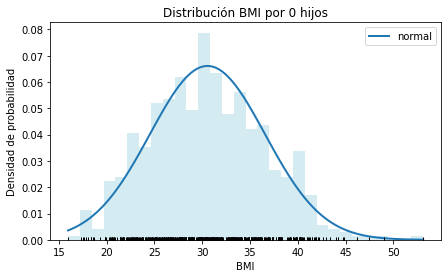

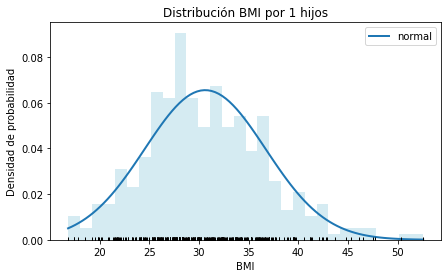

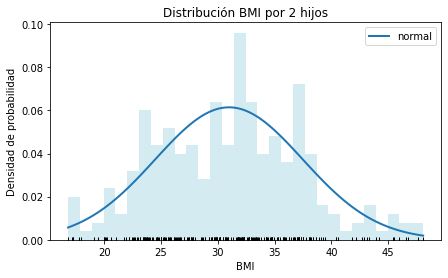

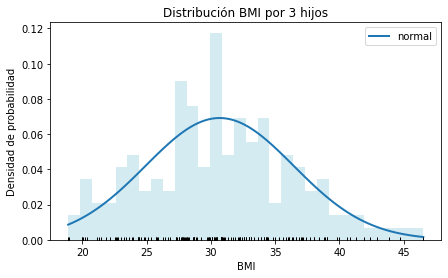

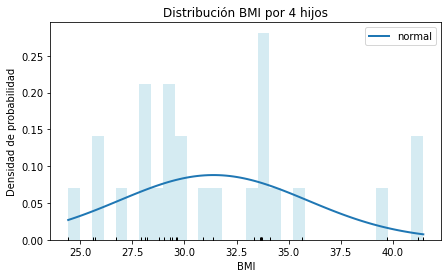

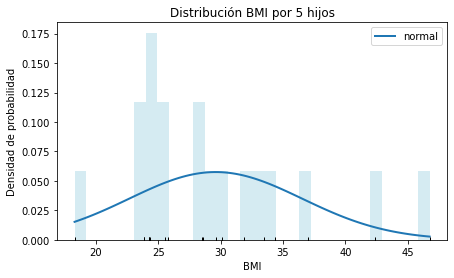

In [51]:
# Histograma + distribución normal teórica
df_children = [df_children0["bmi"], df_children1["bmi"], df_children2["bmi"], df_children3["bmi"], df_children4["bmi"], df_children5["bmi"]]

# Valores de la media (mu) y desviación típica (sigma) de los datos
n=0
for i in df_children:
  charges = i
  mu, sigma = stats.norm.fit(charges)

  # Valores teóricos de la normal en el rango observado
  x_hat = np.linspace(min(charges), max(charges), num=100)
  y_hat = stats.norm.pdf(x_hat, mu, sigma)

  # Gráfico
  fig, ax = plt.subplots(figsize=(7,4))
  ax.plot(x_hat, y_hat, linewidth=2, label='normal')
  ax.hist(x=charges, density=True, bins=30, color="lightblue", alpha=0.5)
  ax.plot(charges, np.full_like(charges, 0), '|k', markeredgewidth=1)
  ax.set_title(f'Distribución BMI por {n} hijos')
  ax.set_xlabel('BMI')
  ax.set_ylabel('Densidad de probabilidad')
  ax.legend();
  n+=1

In [52]:
# Cursotis y Asemetría
n=0
for bmi in df_children:
  print(f'{n} hijos: Cursotis =', stats.kurtosis(bmi))
  print(f'{n} hijos Skewness =', stats.skew(bmi))
  n+=1

0 hijos: Cursotis = -0.21075925701814668
0 hijos Skewness = 0.23055313386796622
1 hijos: Cursotis = 0.40775952056358067
1 hijos Skewness = 0.46341028819039504
2 hijos: Cursotis = -0.2734031213126271
2 hijos Skewness = 0.15965848789441872
3 hijos: Cursotis = -0.28899323533181587
3 hijos Skewness = 0.19024791771945407
4 hijos: Cursotis = -0.11292235924103222
4 hijos Skewness = 0.7351559888346129
5 hijos: Cursotis = 0.315429451043614
5 hijos Skewness = 0.8838053719870942


Text(0.5, 1.0, 'Multiple Boxplots')

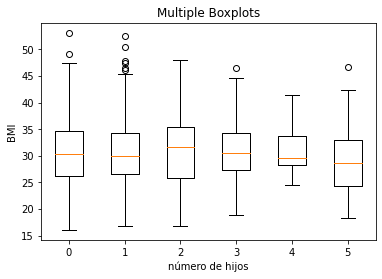

In [53]:
fig, ax = plt.subplots()
ax.boxplot(df_children)
ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])
ax.set_xlabel('número de hijos')
ax.set_ylabel('BMI')
ax.set_title('Multiple Boxplots')

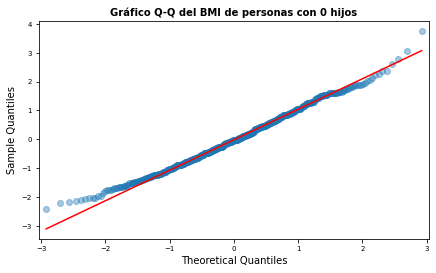

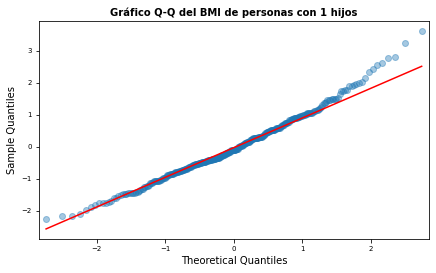

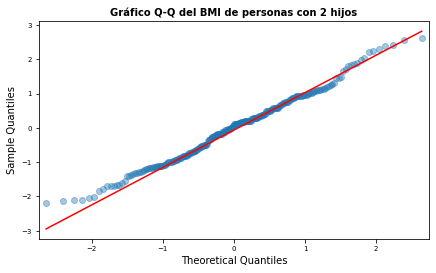

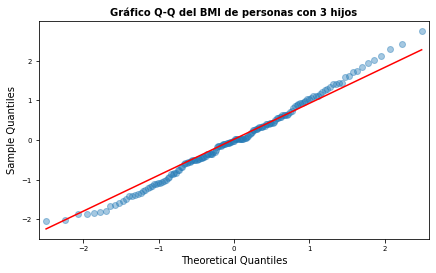

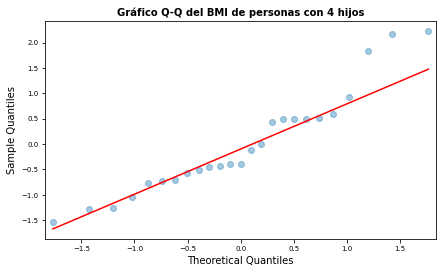

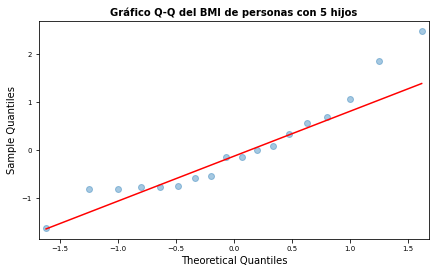

In [54]:
# Gráfico Q-Q
n=0
for bmi in df_children:
  fig, ax = plt.subplots(figsize=(7,4))
  sm.qqplot(
      bmi,
      fit   = True,
      line  = 'q',
      alpha = 0.4,
      lw    = 2,
      ax    = ax
  )
  ax.set_title(f'Gráfico Q-Q del BMI de personas con {n} hijos', fontsize = 10,
              fontweight = "bold")
  ax.tick_params(labelsize = 7)
  n+=1

In [55]:
# Contraste de hipótesis de la normalidad
# con el D'Agostino's K-squared test
n=0
for bmi in df_children:
  k2, p_value = stats.normaltest(bmi)
  print(f"{n} hijos: Estadístico = {k2} , p-value = {p_value}")
  n+=1

0 hijos: Estadístico = 6.1272800178145355 , p-value = 0.046717333838322404
1 hijos: Estadístico = 13.29619962713981 , p-value = 0.001296483326359607
2 hijos: Estadístico = 1.7191527291692401 , p-value = 0.42334138673943467
3 hijos: Estadístico = 1.411106374956069 , p-value = 0.493835315168795
4 hijos: Estadístico = 3.0380183776410328 , p-value = 0.2189286965258307
5 hijos: Estadístico = 4.180662166461037 , p-value = 0.1236461918592578


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Dado que, a pesar de un valor p más pequeño, las demás pruebas indican que sigue más o menos una distribución normal, también la consideramos una distribución normal.Por lo tanto, con todas estas pruebas para el análisis de la normalidad, siguiendo los mismos criterios explicados en el segundo apartado que hemos dedicado al estudio de la normalidad, podemos decir que el BMI según el número de hijos asegurados, siguen todos los grupos una distribución normal.

#### Homocedaticidad de varianzas entre grupos


In [56]:
# Comprobamos igualdad de varianzas con Levene test
for i in range(len(df_children)):
  for j in range(i+1, len(df_children)):
    print(f'Test Levene: {i} hijos vs. {j} hijos:")')

    print(stats.levene(df_children[i], df_children[j], center='median'))

Test Levene: 0 hijos vs. 1 hijos:")
LeveneResult(statistic=0.08547461245325345, pvalue=0.7700787545058981)
Test Levene: 0 hijos vs. 2 hijos:")
LeveneResult(statistic=1.7011624522579838, pvalue=0.19250560061413105)
Test Levene: 0 hijos vs. 3 hijos:")
LeveneResult(statistic=0.8952332928462405, pvalue=0.34437656791489235)
Test Levene: 0 hijos vs. 4 hijos:")
LeveneResult(statistic=3.2153653695314137, pvalue=0.07345596898581369)
Test Levene: 0 hijos vs. 5 hijos:")
LeveneResult(statistic=0.23820233832069432, pvalue=0.6256888299651712)
Test Levene: 1 hijos vs. 2 hijos:")
LeveneResult(statistic=1.820448289444413, pvalue=0.17780323683234125)
Test Levene: 1 hijos vs. 3 hijos:")
LeveneResult(statistic=0.40122235572301773, pvalue=0.5267609706566998)
Test Levene: 1 hijos vs. 4 hijos:")
LeveneResult(statistic=2.4596518174408653, pvalue=0.11771608634518918)
Test Levene: 1 hijos vs. 5 hijos:")
LeveneResult(statistic=0.28129958000888977, pvalue=0.5961969060845232)
Test Levene: 2 hijos vs. 3 hijos:")
Le

Obtenemos p-valores mayores que 0.05 en prácticamente todos los casos, por tanto, podemos decir que hay igualdad de varianza en todos los casos.



#### Muestra aleatoria e independiente

La suponemos como cierta.


#### ANOVA

In [57]:
# Realizamos el test de ANOVA para bmi y hijos
model = ols('bmi ~ children',
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq      df         F   PR(>F)
children      8.093929     1.0  0.217522  0.64101
Residual  49712.106457  1336.0       NaN      NaN


El resultado de la prueba arroja una estadística F de 0.2175 y un valor p de 0.64, lo que indica que no hay una diferencia significativa entre las medias de cada grupo.

### 3.6.b ANOVA del "BMI" según la región en la que vive el asegurado

#### Poblaciones normalmente distribuidas en cada grupo

In [58]:
# Separamos por grupos (regiones)
df_region1 = df[df['region'] == "southwest"] 
df_region2 = df[df['region'] == "southeast"] 
df_region3 = df[df['region'] == "northwest"] 
df_region4 = df[df['region'] == "northeast"] 

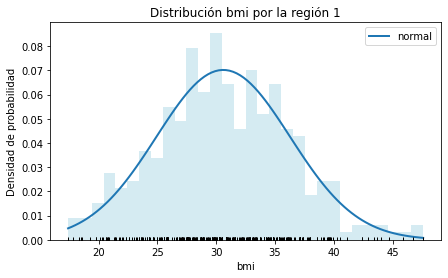

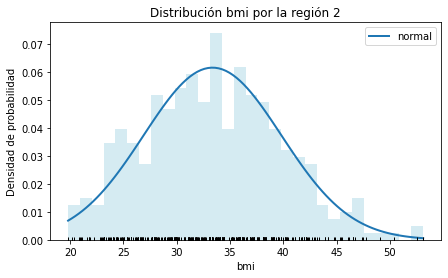

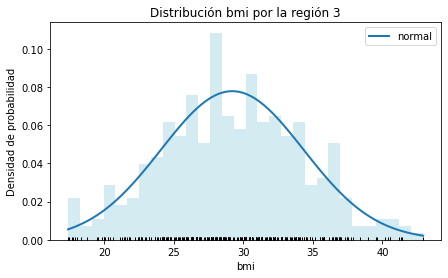

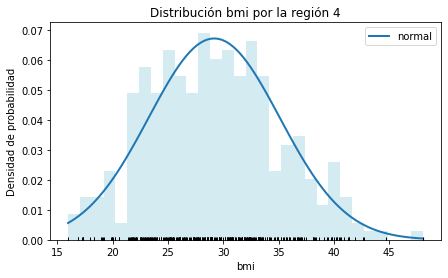

In [59]:
# Histograma + distribución normal teórica
df_region = [df_region1["bmi"], df_region2["bmi"], df_region3["bmi"], df_region4["bmi"]]

# Valores de la media (mu) y desviación típica (sigma) de los datos
n = 1
for i in df_region:
  bmi_region = i
  mu, sigma = stats.norm.fit(bmi_region)

  # Valores teóricos de la normal en el rango observado
  x_hat = np.linspace(min(bmi_region), max(bmi_region), num=100)
  y_hat = stats.norm.pdf(x_hat, mu, sigma)

  # Gráfico
  fig, ax = plt.subplots(figsize=(7,4))
  ax.plot(x_hat, y_hat, linewidth=2, label='normal')
  ax.hist(x=bmi_region, density=True, bins=30, color="lightblue", alpha=0.5)
  ax.plot(bmi_region, np.full_like(bmi_region, 0), '|k', markeredgewidth=1)
  ax.set_title(f'Distribución bmi por la región {n}')
  ax.set_xlabel('bmi')
  ax.set_ylabel('Densidad de probabilidad')
  ax.legend();
  n+=1

In [60]:
# Cursotis y Asemetría
n=1
for bmi in df_region:
  print(f'Región {n}: Cursotis:', stats.kurtosis(bmi))
  print(f'Región {n}: Skewness:', stats.skew(bmi))
  n+=1

Región 1: Cursotis: -0.13993769951700763
Región 1: Skewness: 0.15944355350083328
Región 2: Cursotis: -0.3117806867486279
Región 2: Skewness: 0.21944117762028706
Región 3: Cursotis: -0.3103958352693108
Región 3: Skewness: 0.044090843995824996
Región 4: Cursotis: -0.3023627546288292
Región 4: Skewness: 0.228356749790193


Text(0.5, 1.0, 'Boxplots de bmi por regiones')

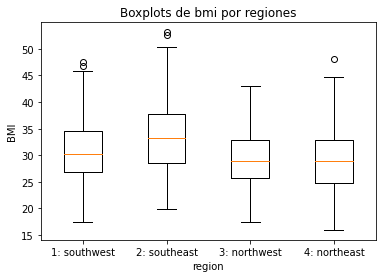

In [61]:
# Boxplots
fig, ax = plt.subplots()
ax.boxplot(df_region)
ax.set_xticklabels(['1: southwest', '2: southeast', '3: northwest', '4: northeast'])
ax.set_xlabel('region')
ax.set_ylabel('BMI')
ax.set_title('Boxplots de bmi por regiones')

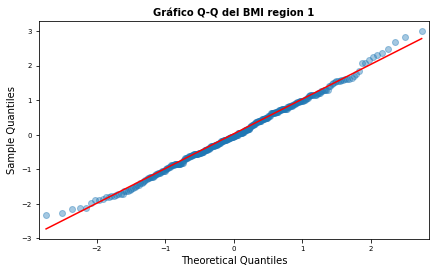

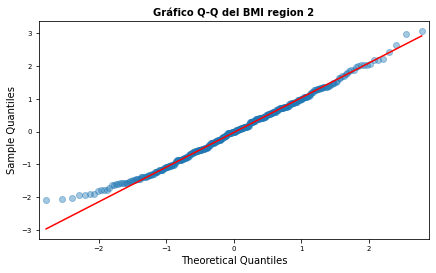

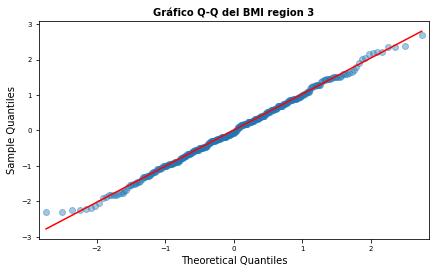

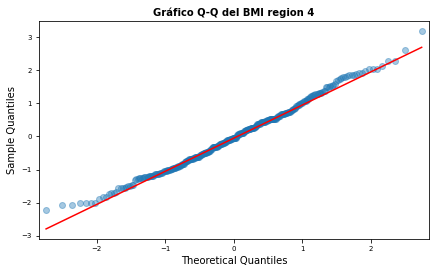

In [62]:
# Gráficos Q-Q
n = 1
for bmi in df_region:
  fig, ax = plt.subplots(figsize=(7,4))
  sm.qqplot(
      bmi,
      fit   = True,
      line  = 'q',
      alpha = 0.4,
      lw    = 2,
      ax    = ax
  )
  ax.set_title(f'Gráfico Q-Q del BMI region {n}', fontsize = 10,
              fontweight = "bold")
  ax.tick_params(labelsize = 7)
  n+=1

In [63]:
# Contraste de hipótesis de la normalidad
# con el D'Agostino's K-squared test
n = 1
for bmi in df_region:
  k2, p_value = stats.normaltest(bmi)
  print(f"Región {n}: Estadístico= {k2}, p-value = {p_value}")
  n+=1

Región 1: Estadístico= 1.5610172823787771, p-value = 0.45817290641481057
Región 2: Estadístico= 4.6166945625351445, p-value = 0.09942543812923942
Región 3: Estadístico= 1.5192955665611054, p-value = 0.4678311759565901
Región 4: Estadístico= 4.178353178494429, p-value = 0.12378902307684393


Con todas estas pruebas para el análisis de la normalidad, siguiendo los mismos criterios explicados en el segundo apartado que hemos dedicado al estudio de la normalidad, podemos decir que el BMI según la región en la que viven, siguen todos los grupos una distribución normal.

#### Homocedaticidad de varianzas entre grupos

In [64]:
# Comprobamos igualdad de varianzas con Levene test
for i in range(len(df_region)):
  for j in range(i+1, len(df_region)):
    print(f"Test Levene: región {i+1} vs. región {j+1}:")
    print(stats.levene(df_region[i], df_region[j], center='median'))

Test Levene: región 1 vs. región 2:
LeveneResult(statistic=6.291227027497553, pvalue=0.012363071218201729)
Test Levene: región 1 vs. región 3:
LeveneResult(statistic=2.684755719049785, pvalue=0.10179817433354514)
Test Levene: región 1 vs. región 4:
LeveneResult(statistic=0.8751409809363376, pvalue=0.3498850115527953)
Test Levene: región 2 vs. región 3:
LeveneResult(statistic=17.63275593973158, pvalue=3.0320363290116026e-05)
Test Levene: región 2 vs. región 4:
LeveneResult(statistic=2.482057196260621, pvalue=0.11561258051028914)
Test Levene: región 3 vs. región 4:
LeveneResult(statistic=6.786680644421565, pvalue=0.009395164960505957)


Obtenemos p-valores mayores que 0.05 en los casos 
 - region 1 vs. 3 (southwest vs northwest)
 - region 1 vs. 4 (southwest vs northeast)
 - region 2 vs. 4 (southeast vs northeast)
 
por tanto, podemos decir que hay igualdad de varianza en esos casos.

#### Muestra aleatoria e independiente

La suponemos como cierta.

#### ANOVA

In [65]:
model = ols('bmi ~ region',
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


El resultado de la prueba sugiere que los grupos no tienen las mismas medias muestrales en este caso, ya que el valor p es muy pequeño.
Para verificar qué grupos difieren después de obtener un resultado ANOVA positivo, se puede realizar una prueba de seguimiento o "prueba post-hoc".

Una prueba post-hoc es realizar una prueba t separada para cada par de grupos. Puede realizar una prueba t entre todos los pares ejecutando cada par a través de stats.ttest_ind() que cubrimos en la lección sobre pruebas t:



In [66]:
# Grupar datos del bmi por regiones
voter_frame = pd.DataFrame({"region":df["region"],"bmi":bmi})
groups = voter_frame.groupby("region").groups 

region_pairs = []

for region1 in range(3):
    for region2  in range(region1+1,4):
        region_pairs.append((df["region"][region1], df["region"][region2]))

# Conduct t-test on each pair
for region1, region2 in region_pairs: 
    print(f'Prueba t entre el par: {region1} vs. {region2}:')
    print(stats.ttest_ind(df["bmi"][groups[region1]], 
                          df["bmi"][groups[region2]]))

Prueba t entre el par: southwest vs. southeast:
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
Prueba t entre el par: southwest vs. southeast:
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
Prueba t entre el par: southwest vs. northwest:
Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
Prueba t entre el par: southeast vs. southeast:
Ttest_indResult(statistic=0.0, pvalue=1.0)
Prueba t entre el par: southeast vs. northwest:
Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
Prueba t entre el par: southeast vs. northwest:
Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)


Los valores p para cada prueba t por pares sugieren que la media de todas las regiones difieren bastante todas entre todas. Sin embargo, el uso de pruebas t por pares no ajustadas puede sobrestimar la importancia, porque cuantas más comparaciones haga, más probable es que encuentre un resultado poco probable debido a la casualidad. Podemos ajustar este problema de comparación múltiple dividiendo el nivel de significación estadística por el número de comparaciones realizadas. En este caso, si estuviéramos buscando un nivel de significación del 5 %, estaríamos buscando valores de p de 0,05/10 = 0,005 o menos. Este ajuste simple para comparaciones múltiples se conoce como la corrección de Bonferroni.

La corrección de Bonferroni es un enfoque conservador para dar cuenta del problema de comparaciones múltiples que puede terminar rechazando resultados que en realidad son significativos. Otra prueba post hoc común es la prueba de Tukey:

    H0:Todas las medias de cada región son iguales

    H1: Al menos una de las medias es distinto a los demás

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


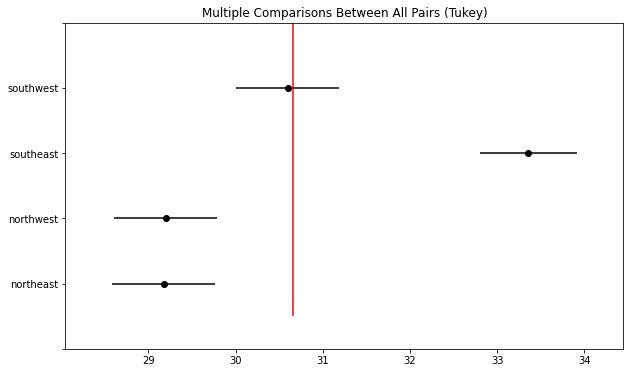

In [67]:
# Hacemos la prueba de Tukey
# Calculamos un intervalo de confianza para cada grupo y nos va a decir cuales tienen un intervalo de confianza distintos
tukey = pairwise_tukeyhsd(endog=df["bmi"],
                          groups=df["region"],
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()
plt.vlines(x=mean_bmi_all,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

Ya que en la mayoría de los casos se rechaza la hipótesis nula, se concluye que al menos dos medias de los grupos son significativamente diferentes.

La prueba Turkey no rechaza la hipótesis nula en el caso de región northeast vs. northwest, que significa que no hay suficiente evidencia para demostrar que hay diferencias significativas entre las medias de esas dos regiones.

# 4 CONCLUSIONES

*   **Se logra describir el dataset con gráficos y calcúlos:**
  * Se concluye que tenemos un dataset que consta de 1338 asegurados, de los cuales aproximadamente la mitad son mujeres y la otra mitad hombres, con edades entre los 18 y los 64 años, distribuidos uniformemente en cuatro regiones de EEUU, y de los cuales el 80% no fuma. Las aseguradas tienen de 0 a 5 hijos, y la frecuencia disminuye a medida que aumenta el número de hijos. El número de asegurados disminuye a medida que aumentan los costes (parece que según una función exponencial decreciente). El BMI se comporta según una curva de campana de Gauss. *(Objetivo 1)*

*   **Se logra analizar la relación entre el BMI y los gastos médicos:**
  * Se concluye que es menos probable que exista una relación lineal entre el BMI y los gastos médicos. *(Objetivo 2)*

*   **Se logra realizar estudios de normalidad de la variable BMI:**
  * Se concluye que a pesar de los D'Agostino's K-squared tests, todas las pruebas indican que las distribuciones de la variable BMI tanto para toda la población, para los hombres y para las mujeres son normales. *(Objetivo 3)*

*   **Se logra analizar la inferencia estadística con estimación:**
  * Se concluye que no hay una diferencia significativa entre la media poblacional estimada y la verdadera media poblacional al nivel de confianza del 95%. *(Objetivo 4)*

*   **Se logra realizar dos estudios t-Tests:**
  * Se concluye que no hay suficientes evidencias estadísticas para rechazar la hipótesis nula de que las medias del BMI frente el género son iguales. Por lo tanto las medias del BMI de los hombres y de las mujeres coinciden con la de la población total y entre ellas. *(Objetivo 5)*
  * Se concluye que hay suficientes evidencias estadísticas para rechazar la hipótesis nula de que las medias de los costes frente el hábito de fumar son iguales. Por lo tanto la media de los costes de los fumadores y la de los no fuamdores son completamente distintas de la población total y entre ellas. *(Objetivo 6)*

*   **Se logra realizar dos pruebas ANOVAS:**
  * Se concluye que no hay una diferencia significativa en las medias del BMI entre cada par de grupos del número de hijos que tienen los asegurados. *(Objetivo 7)*
  * Se concluye que hay diferencias significativas en las medias del BMI entre todos los regiones, con la excepción de que no hay diferencias significativas entre el par de grupos del noreste y noroeste. *(Objetivo 8)*

